In [316]:
import random as rand
import numpy as np

In [317]:
# Variables importantes

iteraciones = 50
a = 0.8 # Inercia
b1 = 0.7 # Aprendizaje local
b2 = 1.2 # Aprendizaje global
numero_particulas = 20
particulas = [[0,0]]*numero_particulas
velocidades = [[0,0]]*(numero_particulas+1)


In [318]:
# Inicializar posición
def posicion_inicial():
    x = rand.uniform(-5,5)
    y = rand.uniform(-5,5)
    return x,y

In [319]:
# Evaluar aptitud
def evaluar_funcion(x, y):
    return x**2 + y**2 + 25 * (np.sin(x) + np.sin(y))

In [320]:
# Determinar pbest
def determinar_pbest(pbest_anterior, fitness):
    if pbest_anterior[0] <= fitness[0]:
        return pbest_anterior

    return fitness

In [321]:
# Calcular velocidades
def calcular_velocidades(particula,velocidades, gbest, pbest):
    gbestx = gbest[1]
    gbesty = gbest[2]
    pbestx = pbest[1]
    pbesty = pbest[2]
    x,y = particula
    vx = velocidades[0]
    vy = velocidades[1]
    
    r1 = rand.uniform(0,1)
    r2 = rand.uniform(0,1)
    
    vx = a * vx + b1 * r1 * (pbestx - x) + b2 * r2 * (gbestx - x)
    vy = a * vy + b1 * r1 * (pbesty - y) + b2 * r2 * (gbesty - y)
    
    return (vx, vy)

In [322]:
# Calcular nuevas posiciones
def actualizar_posicion(particula, velocidades):
    x, y = particula
    vx = velocidades[0]
    vy = velocidades[1]
    
    x += vx
    y += vy
    
    if x < -5:
        x = -5
    elif 5 < x:
        x = 5
        
    if y < -5:
        y = -5
    elif 5 < y:
        y = 5
    
    return x, y

In [323]:
fitness = [[0,0,0]]*numero_particulas
pbest = []
gbest = [0,0,0]

for i in range(numero_particulas):
    x, y = posicion_inicial()
    particulas[i] = [x,y]
    pbest.append([evaluar_funcion(x,y), x,y])

gbest = pbest[0]

for i in range(iteraciones):
    
    print(f"ITERACIÓN: {i}\n")
    print(f"POSICIONES DE LAS PARTÍCULAS:")

    for j,particula in enumerate(particulas):
        print(f"Partícula {j}: ({particula[0]}, {particula[1]})")
        x,y= particula
        fitness[j] = (evaluar_funcion(x,y),x,y)

    print("\nPBEST:")
    # Determinar pbest y gbest
    for k in range(numero_particulas):
        pbest[k] = determinar_pbest(pbest[k], fitness[k])
        if pbest[k][0] < gbest[0]:
            gbest = pbest[k]
        print(f"Pbest partícula {k}: {pbest[k][0]}, ({pbest[k][1]}, {pbest[k][2]})")
        
    print(f"\nGBEST: {gbest[0]}, ({gbest[1]}, {gbest[2]})")
    
    print("\nVELOCIDADES:")
    
    for i, particula in enumerate(particulas):
        velocidades[i+1] = calcular_velocidades(particula, velocidades[i], gbest, pbest[i])
        print(f"Velocidad de la partícula {i}: Vx: {velocidades[i+1][0]} Vy: {velocidades[i+1][1]}")
        x, y = actualizar_posicion(particula, velocidades[i+1])
        particula[0] = x
        particula[1] = y





ITERACIÓN: 0

POSICIONES DE LAS PARTÍCULAS:
Partícula 0: (-3.9764182098204017, -4.91667478977741)
Partícula 1: (2.7385413430280527, -2.498087891170507)
Partícula 2: (-2.6134787127740946, 1.9297638962088568)
Partícula 3: (1.3486475846040094, 4.997028672570394)
Partícula 4: (-3.0588174104669053, -1.79558372326564)
Partícula 5: (4.173937110943433, 2.421851175960562)
Partícula 6: (-0.10114808062800318, -2.419242371107273)
Partícula 7: (-0.033809720857238545, 4.598835152260305)
Partícula 8: (0.37209790976966595, -0.0006635244525909911)
Partícula 9: (-2.6540737069158626, -4.441419569597443)
Partícula 10: (-2.141213104527371, 2.771851630913428)
Partícula 11: (2.880299530847129, -3.2167546822714135)
Partícula 12: (2.288042131699898, 1.0799305021132968)
Partícula 13: (1.8145630460416857, -4.3451075625255875)
Partícula 14: (-2.1500636330807454, -1.8701439025002942)
Partícula 15: (2.643475851810951, 4.520706685195178)
Partícula 16: (-0.3621053990656673, 3.5808299132507475)
Partícula 17: (-4.62116

In [324]:
from scipy.optimize import minimize

def f_obj(vars):
    x, y = vars
    return x**2 + y**2 + 25 * (np.sin(x) + np.sin(y))

res = minimize(f_obj, [0, 0], method='BFGS')


print("scipy:", res.x, res.fun)


scipy: [-1.45419657 -1.45419657] -45.43112199357747


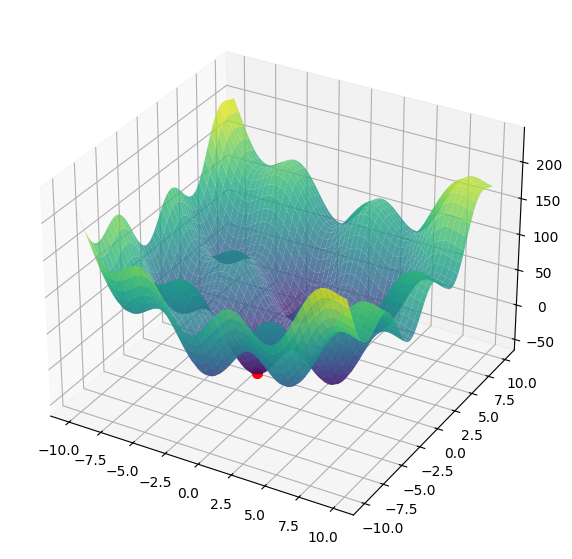

In [328]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.linspace(-10, 10, 200)
Y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 + 25*(np.sin(X) + np.sin(Y))

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
valor, x_best, y_best = gbest

ax.scatter(x_best, y_best, valor, color='red', s=50)
plt.show()
